# LangChain

- [Complete How-To Documentation](https://python.langchain.com/docs/how_to/)
- [Complete API Reference](https://python.langchain.com/api_reference/)


## Keys management and basic setup

1. Create a `.env` file.
2. Store your API keys like this:
   ```plaintext
   MY_KEY=1234567890

In [ ]:
!pip install langchain langchain_huggingface langchain-community transformers torch langchainhub langchain-openai

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()

if __name__ == "__main__":
    print(os.getenv('MY_KEY'))

1234567890


## Prompt template

- Where we can use a prompt 
  - Single Message interaction with AI with no chat history [Case 1]
  - Single Message interaction with AI with chat history [Case 2]
- Types of prompt in [Case 1] and [Case 2]:-
  - Static Prompts
  - Dynamic Prompts



### Types of Prompt template in [Case 1]

#### Static Prompts

In [ ]:
# Hugging face api chat models
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv
import os

load_dotenv()
os.environ["HUGGINGFACEHUB_API_TOKEN"] = os.getenv("HUGGINGFACEHUB_API_TOKEN")

llm = HuggingFaceEndpoint(
    repo_id="HuggingFaceH4/zephyr-7b-beta",
    task="text-generation"
)

model = ChatHuggingFace(llm=llm)

result = model.invoke("What is the capital of India") # static prompt
print(result.content)

#### Dynamic Prompt

In [ ]:
from langchain_core.prompts import PromptTemplate
template= PromptTemplate(
    template="""
    Question: {question_text},
    Answer {answer_text}.
    """,
    input_variables=['question_text', 'answer_text'],
    validate_template=True
)
question="What is the capital of India"
answer= "this question step by step"
chain = template | model 
result= chain.invoke({
    "question_text": question,
    "answer_text": answer
})
print(result.content)

### Types of Prompt template in [Case 2]


- Types of messages (used in chat history):-
  - System messages: The first message we send to ai (like - you are a helpful assistant)
  - Human messages:- Messages send by human
  - AI messages:- Messages send by AI

- Message Placeholder:- A MessagesPlaceholder in LangChain is a spectal placeholder used inside a
ChatPromptTemplate to dynamically insert chat history or a list of messages at runtime.

#### Static

In [ ]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage


chat_history = [
    SystemMessage(content='You are a helpful AI assistant')
]

while True:
    user_input = input('You: ')
    chat_history.append(HumanMessage(content=user_input))
    if user_input == 'exit':
        break
    result = model.invoke(chat_history)
    chat_history.append(AIMessage(content=result.content))
    print("AI: ",result.content)

print(chat_history)

#### Dynamic

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate([
    ('system', 'You are a helpful {domain} expert'), # system message 
    ('human', 'Explain in simple terms, what is {topic}') # human message
])

prompt = chat_template.invoke({'domain':'cricket','topic':'whit ball'})



#### Message Placeholder

- Example:- For a chatbot with chathistory feature, once the chat is completed we save the chat history in a db and when user comes again the chat history will be loaded first form db to message placeholder and then the user new query with previous history is given to the model!!

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

chat_template = ChatPromptTemplate([
    ('system', 'You are a helpful {domain} expert'), # system message 
    MessagesPlaceholder(variable_name='chat_history'),
    ('human', 'Explain in simple terms, what is {topic}') # human message
])

chat_histry =[]   #get it from db

chat_template.invoke({'domain':'cricket','topic':'whit ball', 'chat_history':chat_histry})

# Models

- There are 2 types of it - language models and embedding models
 - language models are also 2 types llm models and chat models
 - LLMs are general purpose models but chat models are special purpose models
 - A llm model can do text generation, text summerization, code generation, question answering, etc
 - But a chat models can take sequence of messages as input and return chat messages as output (they also have momery)
 -Langchain is moving towards chat bots and slowly moving away from the llms
 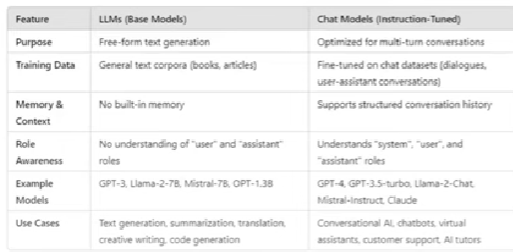  


## LLMs
 - Working with openai only

In [ ]:
from langchain_openai import OpenAI
import os
from dotenv import load_dotenv

load_dotenv()
my_key = os.getenv("MY_OPENAI_KEY")

llm = OpenAI(model='gpt-3.5-turbo-instruct', openai_api_key=my_key)

result = llm.invoke("What is the capital of India")

print(result)

## ChatModels

[What is ChatModels and its standard parameters (like temperature..)](https://python.langchain.com/docs/concepts/chat_models/)

[How to use all paid models (like openai) with langchain](https://python.langchain.com/docs/integrations/chat/)

  - [Chtagpt model info](https://platform.openai.com/docs/models)
  - [Gemini models info](https://ai.google.dev/gemini-api/docs/models/gemini)
  - [Hugging face models](https://huggingface.co/models)

Code

 - OpenAI chat models
 - Anthropic chat models
 - Google geminia chat models
 - Hugging face api chat models
 - Hugging face local chat models

Standerd Parameters
- **model**:- The name or identifier of the specific AI model you want to use (e.g., "gpt-3.5-turbo" or "gpt-4").

- **temperature**:- Controls the randomness of the model's output. A higher value (e.g., 1.0) makes responses more creative, while a lower value (e.g., 0.0) makes them more deterministic and focused.

- **timeout**:- The maximum time (in seconds) to wait for a response from the model before canceling the request. Ensures the request doesn’t hang indefinitely.

- **max_tokens**:- Limits the total number of tokens (words and punctuation) in the response. This controls how long the output can be.

- **stop**:- Specifies stop sequences that indicate when the model should stop generating tokens. For example, you might use specific strings to signal the end of a response.

- **max_retries**:- The maximum number of attempts the system will make to resend a request if it fails due to issues like network timeouts or rate limits.

- **api_key**:- The API key required for authenticating with the model provider. This is usually issued when you sign up for access to the model.

- **base_url**:- The URL of the API endpoint where requests are sent. This is typically provided by the model's provider and is necessary for directing your requests.

- **rate_limiter**:- An optional BaseRateLimiter to space out requests to avoid exceeding rate limits. See rate-limiting below for more details.

In [ ]:
# OpenAI chat models
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os

load_dotenv()
my_openai_key = os.getenv("MY_OPENAI_KEY")

model = ChatOpenAI(model='gpt-4', temperature=1.5, max_completion_tokens=10, api_key=my_openai_key
)

result = model.invoke("Write a 5 line poem on cricket")

print(result.content)

In [ ]:
# Anthropic chat models
from langchain_anthropic import ChatAnthropic
from dotenv import load_dotenv
import os

load_dotenv()
my_anthropic_key = os.getenv("MY_ANTHROPIC_KEY") # In your .env: MY_ANTHROPIC_KEY=abc...

model = ChatAnthropic(model='claude-3-5-sonnet-20241022', api_key=my_anthropic_key)

result = model.invoke('What is the capital of India')

print(result.content)

In [ ]:
# Google geminia chat models
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import os

load_dotenv()
my_google_key = os.getenv("MY_GOOGLE_KEY")  # In your .env: MY_GOOGLE_KEY=def...

model = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    api_key=my_google_key
)

result = model.invoke('What is the capital of India')

print(result.content)

In [ ]:
# Hugging face api chat models
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv
import os

load_dotenv()
my_hf_key = os.getenv("MY_HUGGINGFACE_KEY")

llm = HuggingFaceEndpoint(
    repo_id="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    task="text-generation",
    huggingfacehub_api_token=my_hf_key
)

model = ChatHuggingFace(llm=llm)

result = model.invoke("What is the capital of India")

print(result.content)

In [ ]:
# Hugging face local chat models
from langchain_huggingface import ChatHuggingFace, HuggingFacePipeline
import os
llm = HuggingFacePipeline.from_model_id(
    model_id='TinyLlama/TinyLlama-1.1B-Chat-v1.0',
    task='text-generation',
    pipeline_kwargs=dict(
        temperature=0.5,
        max_new_tokens=100
    )
)
model = ChatHuggingFace(llm=llm)

result = model.invoke("What is the capital of India")

print(result.content)

## Embedding Models

[What is Embedding Models and its standard methods (like embed_documents and embed_query)](https://python.langchain.com/docs/concepts/embedding_models/)

[How to use all paid models and their integration with langchain](https://python.langchain.com/docs/integrations/text_embedding/)

  - [Chtagpt model info]()
  - [Hugging face models]()

code
  - Embedding Openai query
  - Embedding Openai Docs
  - Embedding Hugging face Docs and query by local
  - Embedding Hugging face Docs and query by API

In [ ]:
# Embedding Openai query
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv
import os

load_dotenv()
my_openai_key = os.getenv("MY_OPENAI_KEY")  # In your .env: MY_OPENAI_KEY=123...

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=32, api_key=my_openai_key)

result = embedding.embed_query("Delhi is the capital of India")

print(str(result))

In [ ]:
# Embedding Openai Docs
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv
import os

load_dotenv()
my_openai_key = os.getenv("MY_OPENAI_KEY")  # In your .env: MY_OPENAI_KEY=123...

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=32, api_key=my_openai_key)

documents = [
    "Delhi is the capital of India",
    "Kolkata is the capital of West Bengal",
    "Paris is the capital of France"
]

result = embedding.embed_documents(documents)

print(str(result))

In [ ]:
# Embedding Hugging face Docs and query by local
from langchain_huggingface import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')

documents = [
    "Delhi is the capital of India",
    "Kolkata is the capital of West Bengal",
    "Paris is the capital of France"
]

vector = embedding.embed_documents(documents)

print(str(embedding.embed_query("Hello, world!")))
print(str(vector))

In [ ]:
# Embedding Hugging face Docs and query by API
from langchain_community import HuggingFaceInferenceAPIEmbeddings
from dotenv import load_dotenv
import os

load_dotenv()
my_huggingface_api_token = os.getenv("MY_HUGGINGFACE_API_TOKEN")  # In your .env: MY_HUGGINGFACE_API_TOKEN=your_token_here

embedding = HuggingFaceInferenceAPIEmbeddings(
    model_id="sentence-transformers/all-MiniLM-L6-v2",  # example Hugging Face model
    api_token=my_huggingface_api_token
)

documents = [
    "Delhi is the capital of India",
    "Kolkata is the capital of West Bengal",
    "Paris is the capital of France"
]

result = embedding.embed_documents(documents)

query_embedding = embedding.embed_query("Hello, world!")

print("Query Embedding:", query_embedding)
print("Document Embeddings:", result)


# Structured Output

- There are 2 types of model
   - who can generate structure output like (gpt) -> use with_structure_output method
   - who can not enerate structure output -> use output_parsers

## with_structure_output

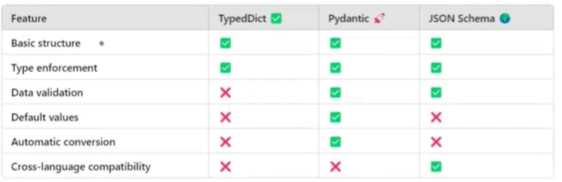
- 3 differnt ways to define the output parameters
  - TypedDict
  - Pydantic
  - json_schema

- 2 Different ways to get the output

```python

with_structured_output("text", method="function_calling/json_mode/json_schema")

### TypedDict
- Return python dictionary
- TypedDict is a way to.define a dictionary in Python where you specify what keys and values
should exist. It helps ensure that your dictionary follows a specific structure.

Corn of TypedDict
- The return datatype is not guaranteed

In [ ]:
from typing import TypedDict, Annotated, Optional, Literal

# schema
class Review(TypedDict):

    key_themes: Annotated[list[str], "Write down all the key themes discussed in the review in a list"]
    summary: Annotated[str, "A brief summary of the review"]
    sentiment: Annotated[Literal["pos", "neg"], "Return sentiment of the review either negative, positive or neutral"]
    pros: Annotated[Optional[list[str]], "Write down all the pros inside a list"]
    cons: Annotated[Optional[list[str]], "Write down all the cons inside a list"]
    name: Annotated[Optional[str], "Write the name of the reviewer"]
    

structured_model = model.with_structured_output(Review)

result = structured_model.invoke("text input of user")

print(result['name'])

### Pydantic

- Return Pydantic object
- Pydantic is a data validation and data parsing library for Python. It ensures that the data you work with is correct, structured, and type-safe.

Pros
- It tries to understand which data type is coming and also performs typecasting if possible. For example, if an integer is expected but it comes as a string like `'32'`, Pydantic will automatically convert it to `32`.
- Field function: description, default value, constraints, and regex expression.

```
intFiled: Optional[float] = Field(
    default=0,gt=0,lt=10,
    description="a integer filed which will be greater than or equal to 0 and less than or equal to 10"
)

In [ ]:
from typing import Optional, Literal
from pydantic import BaseModel, Field

class Review(BaseModel):

    key_themes: list[str] = Field(description="Write down all the key themes discussed in the review in a list")
    summary: str = Field(description="A brief summary of the review")
    sentiment: Literal["pos", "neg"] = Field(description="Return sentiment of the review either negative, positive or neutral")
    pros: Optional[list[str]] = Field(default=None, description="Write down all the pros inside a list")
    cons: Optional[list[str]] = Field(default=None, description="Write down all the cons inside a list")
    name: Optional[str] = Field(default=None, description="Write the name of the reviewer")
    
structured_model = model.with_structured_output(Review)

result = structured_model.invoke("""Text by user""")
print(result.name)

### Json_schema

- Return Python Dictionary
- Here it is necessary to give these fileds
     - title, type, required(will contain the key name which is not optional) and properties

In [ ]:
# schema
json_schema = {
  "title": "Review",
  "type": "object",
  "properties": {
    "key_themes": {
      "type": "array",
      "items": {
        "type": "string"
      },
      "description": "Write down all the key themes discussed in the review in a list"
    },
    "summary": {
      "type": "string",
      "description": "A brief summary of the review"
    },
    "sentiment": {
      "type": "string",
      "enum": ["pos", "neg"],
      "description": "Return sentiment of the review either negative, positive or neutral"
    },
    "pros": {
      "type": ["array", "null"],
      "items": {
        "type": "string"
      },
      "description": "Write down all the pros inside a list"
    },
    "cons": {
      "type": ["array", "null"],
      "items": {
        "type": "string"
      },
      "description": "Write down all the cons inside a list"
    },
    "name": {
      "type": ["string", "null"],
      "description": "Write the name of the reviewer"
    }
  },
  "required": ["key_themes", "summary", "sentiment"]
}


structured_model = model.with_structured_output(json_schema)

result = structured_model.invoke("""user text""")

print(result)

## output_parsers

- Output Parsers in LangChain help convert raw LLM responses into structured formats like
JSON, CSV, Pydantic models, and more. They ensure consistency, validation, and ease Of use in
applications.

- Most popular output parsers
    - StrOutputParser:- it take model output and return string
    - Jsonoutput:- it return json output but can not enforce any parameters and proper json format
    - structureoutput:- skipped
    - pydnaticoutput:- skipped

### StrOutputParser

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

# 1st prompt -> detailed report
template1 = PromptTemplate(
    template='Write a detailed report on {topic}',
    input_variables=['topic']
)

# 2nd prompt -> summary
template2 = PromptTemplate(
    template='Write a 5 line summary on the following text. /n {text}',
    input_variables=['text']
)

parser = StrOutputParser()

chain = template1 | model | parser | template2 | model | parser

result = chain.invoke({'topic':'black hole'})

print(result)


### Jsonoutputparser

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser

parser = JsonOutputParser()

template = PromptTemplate(
    template='Give me 5 facts about {topic} \n {format_instruction}',
    input_variables=['topic'],
    partial_variables={'format_instruction': parser.get_format_instructions()}
)

chain = template | model | parser

result = chain.invoke({'topic':'black hole'})

print(result)


# Chains

## How i am passing output of one step and input to another step with the control over the name of variable

- help of RunnableAssign and RunnableParallel
- In LCEL, the output of one step becomes the input to the next. Because each runnable (including parallel runnables and assign-runnables) outputs a dictionary, by chaining with the pipe operator (|) we implicitly feed that dictionary to the next step. 

### IF the output of First model is single string which is going in secound model

- Code Explaination
    - ``` RunnableParallel({"Story":story_chain}).invoke({"character_name": "Alice"})```  
    output-> {'Story':"Story...."}
    - ```RunnableAssign(RunnableParallel({"Story":story_chain})).invoke({"character_name": "Alice"})``` 
    output-> {'Story':"Story....", 'character_name': 'Alice'}
    - now chain 2 willl get this output as input dictonary-> {'Story':"Story....", 'character_name': 'Alice'} and the same will continue

In [ ]:
from langchain import PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableParallel
from langchain_core.runnables.passthrough import RunnableAssign

# Define the prompts
prompt1 = PromptTemplate.from_template("Write a short story about {character_name}.")
prompt2 = PromptTemplate.from_template("Summarize this story:\n{Story}")
prompt3 = PromptTemplate.from_template(
    "Given character {character_name} and story summary: {summary}, tell a joke."
)

# Initialize the Google Gemini LLM (requires your Google API key)
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-preview-05-20")

# Build sub-chains for each step
story_chain   = prompt1 | llm | StrOutputParser()
summary_chain = prompt2 | llm | StrOutputParser()
joke_chain    = prompt3 | llm | StrOutputParser()

# Wrap each in a RunnableParallel mapping to a key, then in a RunnableAssign
chain1 = RunnableAssign(RunnableParallel({"Story":story_chain}))
chain2 = RunnableAssign(RunnableParallel({"summary":summary_chain}))
chain3 = RunnableAssign(RunnableParallel({"joke":joke_chain}))

pipeline = chain1 | chain2 | chain3

# Run the pipeline
result = pipeline.invoke({"character_name": "Alice"})
print(result["Story"])    # The story generated about Alice
print("###########################################################################################")
print(result["summary"])  # The summary of that story
print("###########################################################################################")
print(result["joke"])     # A joke involving Alice and the summary

### If the output of the 1 model is a dict(conatining 2 elemnets) and we only wnat to shre one element as input to another prompt, how can we do that?

    - use RunnableLambda to extract bothe the emelmets from the input of the first model

In [ ]:
from langchain_core.runnables import RunnableLambda
extract = RunnableLambda(lambda x: {
    **x, # getting the old values 
    """
    But if you want to get some specific cvalues only then do this -->
    "old_value_1": x["old_value_1"],  # Recopy the old value
    "old_value_2": x["old_value_2"],  # Recopy the old value
    """
    "element1": x["output_from_1_model"]["element1"],
    "element2": x["output_from_1_model"]["element2"]
})
chaina = prompt | structured_model | extract

## Sequential Chains

### Example1

In [ ]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

load_dotenv()

prompt = PromptTemplate(
    template='Generate 5 interesting facts about {topic}',
    input_variables=['topic']
)

model = ChatOpenAI()

parser = StrOutputParser()

chain = prompt | model | parser

result = chain.invoke({'topic':'cricket'})

print(result)

chain.get_graph().print_ascii()

### Example2

- Critical Rules for Variable Binding
    - If next component expects one input variable, previous output is directly mapped

- Note in the given exapmple the text in prompt2 will be the output of parser
    

In [ ]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

load_dotenv()

prompt1 = PromptTemplate(
    template='Generate a detailed report on {topic}',
    input_variables=['topic']
)
prompt2 = PromptTemplate(
    template='Generate a 5 pointer summary from the following text \n {text}',
    input_variables=['text']
)

model = ChatOpenAI()

parser = StrOutputParser()

chain = prompt1 | model | parser | prompt2 | model | parser

result = chain.invoke({'topic': 'Unemployment in India'})

print(result)

chain.get_graph().print_ascii()

## Parallel Chains

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnableParallel

load_dotenv()

model1 = ChatOpenAI()

model2 = ChatAnthropic(model_name='claude-3-7-sonnet-20250219')

prompt1 = PromptTemplate(
    template='Generate short and simple notes from the following text \n {text}',
    input_variables=['text']
)

prompt2 = PromptTemplate(
    template='Generate 5 short question answers from the following text \n {text}',
    input_variables=['text']
)

prompt3 = PromptTemplate(
    template='Merge the provided notes and quiz into a single document \n notes -> {notes} and quiz -> {quiz}',
    input_variables=['notes', 'quiz']
)

parser = StrOutputParser()

parallel_chain = RunnableParallel({
    'notes': prompt1 | model1 | parser,
    'quiz': prompt2 | model2 | parser
})

merge_chain = prompt3 | model1 | parser

chain = parallel_chain | merge_chain

text = """
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.

Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.
"""

result = chain.invoke({'text':text})

print(result)

chain.get_graph().print_ascii()


## Conditional Chains

In [ ]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnableBranch, RunnableLambda
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field
from typing import Literal

load_dotenv()

model = ChatOpenAI()

parser = StrOutputParser()

class Feedback(BaseModel):

    sentiment: Literal['positive', 'negative'] = Field(description='Give the sentiment of the feedback')

parser2 = PydanticOutputParser(pydantic_object=Feedback)

prompt1 = PromptTemplate(
    template='Classify the sentiment of the following feedback text into postive or negative \n {feedback} \n {format_instruction}',
    input_variables=['feedback'],
    partial_variables={'format_instruction':parser2.get_format_instructions()}
)

classifier_chain = prompt1 | model | parser2

prompt2 = PromptTemplate(
    template='Write an appropriate response to this positive feedback \n {feedback}',
    input_variables=['feedback']
)

prompt3 = PromptTemplate(
    template='Write an appropriate response to this negative feedback \n {feedback}',
    input_variables=['feedback']
)

branch_chain = RunnableBranch(
    (lambda x:x.sentiment == 'positive', prompt2 | model | parser),
    (lambda x:x.sentiment == 'negative', prompt3 | model | parser),
    RunnableLambda(lambda x: "could not find sentiment")
)

chain = classifier_chain | branch_chain

print(chain.invoke({'feedback': 'This is a beautiful phone'}))

chain.get_graph().print_ascii()

# Runnables

- Types of Runnables
    - Task specific runnables
    - Runnable primitives

- Task Specific Runnables
    - Definition: These are core LangChain components that have been converted into Runnables SO they can be used in pipeliræs.
    - Examples:
        - ChatOpenAI - Runs an LLM model.
        - PromptTemplate - Formats prompts dynamically.
        - Retriever - Retrieves relevant documents.

- Runnable primitives
    - Definition: These are fundamental building blocks for structuring execution logic in Al workflows
    - Examples:
        - RunnableSequence - Runs steps in order ( | operator).
        - RunnableParallel — Runs multiple steps simultaneously.
        - Runnablemap — Maps the same input across multiple functions.
        - RunnableBranch — Implements conditional execution (if-else logic).
        - RunnableLambda — Wraps custom Python functions into Runnables.
        - RunnablePassthrough - just forwards input as output (acts as a piqqehoider).

- RunnableSequence (| operator)
    - RunnableSequence is a sequential chain of runnables in LangChain that executes each step one after another, passing the output of one step as the input to the next.
    - It is useful when you need to compose multiple runnables together in a structured workflow.

- RunnableParallel
    - Help us in generating a parallel chains

- RunnablePassthrough
    - RunnablePassthrough is a special Runnable primitive that simply returns the input as output without modifying it.
    
- RunnableLambda
    - RunnableLambda is a runnable primitive that allows you to apply custom Python functions within an Al pipeline.
    - It acts as a middleware between different Al components, enabling preprocessing, transformation, API calls, filtering, and post-processing in a LangChain workflow.

- RunnableBranch 
    - Implements conditional execution (if-else logic).

## RunnablePassthrough

- Example:- we make a sequential chain where we aree generating a joke on text and then giving that joke to ai to generate the explaination -> so at the end we only get the explaintion not the joke. RunnablePassthrough fix this issue

- Solution
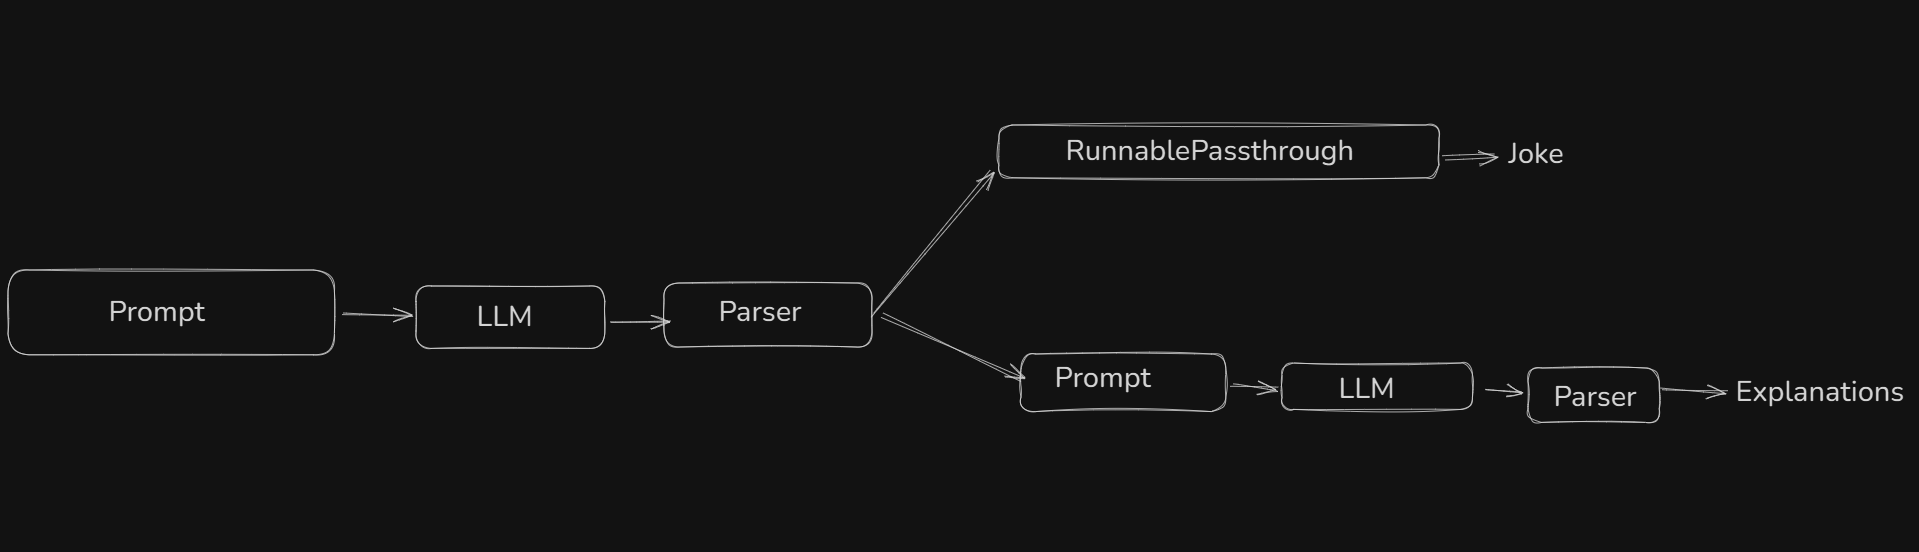

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from dotenv import load_dotenv
from langchain.schema.runnable import RunnableParallel, RunnablePassthrough

load_dotenv()

prompt1 = PromptTemplate(
    template='Write a joke about {topic}',
    input_variables=['topic']
)

model = ChatOpenAI()

parser = StrOutputParser()

joke_gen_chain = prompt1 | model | parser

prompt2 = PromptTemplate(
    template='Explain the following joke - {text}',
    input_variables=['text']
)

parallel_chain = RunnableParallel({
    'joke': RunnablePassthrough(),
    'explanation': prompt2 | model | parser
})

final_chain = joke_gen_chain | parallel_chain

print(final_chain.invoke({'topic':'cricket'}))

## RunnableLambda

- Exmaple:- we are giving the llm a text and asking it to generate a joke on it, ands at last we are making python function to count the words in the output text

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from dotenv import load_dotenv
from langchain.schema.runnable import RunnableLambda, RunnablePassthrough, RunnableParallel

load_dotenv()

def word_count(text):
    return len(text.split())

prompt = PromptTemplate(
    template='Write a joke about {topic}',
    input_variables=['topic']
)

model = ChatOpenAI()

parser = StrOutputParser()

joke_gen_chain = prompt | model | parser

parallel_chain = RunnableParallel({
    'joke': RunnablePassthrough(),
    'word_count': RunnableLambda(word_count)
})

final_chain = joke_gen_chain | parallel_chain

result = final_chain.invoke({'topic':'AI'})

print(result)

## RunnableParallel

- RunnableParallel is a composition primitive that runs multiple runnables in parallel on the same input, producing a dictionary of outputs. It is essentially a mapping from string keys to runnables. When you invoke a RunnableParallel, LangChain runs each mapped runnable concurrently and returns a dict with the same keys, where each value is the output of the corresponding runnable

In [ ]:
from langchain_core.runnables import RunnableParallel, RunnableLambda
# Define simple runnables
r1 = RunnableLambda(lambda x: x + 1)
r2 = RunnableLambda(lambda x: x * 2)

# Parallel mapping: two runnables on the same input
map_chain = RunnableParallel({"plus_one": r1, "times_two": r2})
result = map_chain.invoke(10)
print(result)  # -> {"plus_one": 11, "times_two": 20}

{'plus_one': 11, 'times_two': 20}


## RunnableAssign

- It tak dict as input from a RunnableParallel (called the mapper).
- RunnableAssign is a convenient wrapper for augmenting a dict with new keys
- it merges the mapper’s output into the input dictionary

In [8]:
from langchain_core.runnables.passthrough import RunnableAssign, RunnableParallel
from langchain_core.runnables.base import RunnableLambda

r1 = RunnableLambda(lambda x: {"added": x["input"] + 10})

mapper = RunnableParallel({"add_step": r1})
# result = mapper.invoke(5)
# print(result)  -> {'add_step': {'added': 15}}

runnable_assign = RunnableAssign(mapper)
output= runnable_assign.invoke({"input": 5})

print(output)

{'input': 5, 'add_step': {'added': 15}}


# Document Loaders

- Most Popular Document loaders
    - TextLoader
    - PyPDFLoader
    - WebBaseLoader
    - CSVLoader
- Document loaders are components in LangChain used to load data from various sources into a standardized format (usually as Document objects), which can then be used for chunking, embeddin , retrieval, and generation.
- The Datatype of the document is list
- A sample Document format 

```
Document(
    page_content = "The actual text content",
    matadata={"source": "filename.pdf",...}
)
```

- Lazy Load vs Load

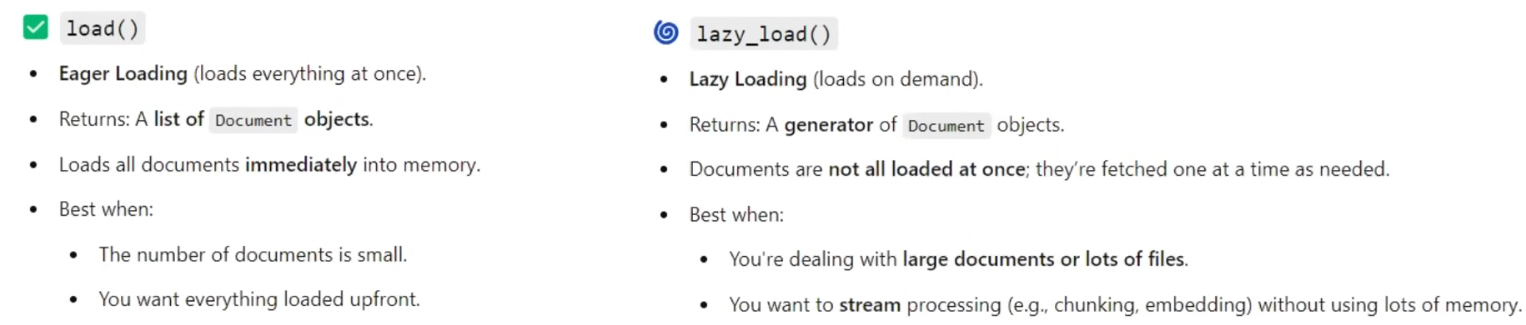

## TextLoader

- TextLoader is a simple and commonly used document loader in LangChain that reads plain text (.txt) files and converts them into LangChain Document objects.

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from dotenv import load_dotenv

load_dotenv()

model = ChatOpenAI()

prompt = PromptTemplate(
    template='Write a summary for the following poem - \n {poem}',
    input_variables=['poem']
)

parser = StrOutputParser()

loader = TextLoader('cricket.txt', encoding='utf-8')

docs = loader.load()  # loader.lazy_load()

print(type(docs))

print(len(docs))

print(docs[0].page_content)

print(docs[0].metadata)

chain = prompt | model | parser

print(chain.invoke({'poem':docs[0].page_content}))

## PyPDFLoader

- not very good with scanned PDF or complex layout Pdf

- better alternative for pdf loader
    - pdf with tables/columns - PDFPlumberLoader
    - scanned/image pdfs - unstructuredPDFLoader or AmazonTextractPDFLoader
    - Image data/layouts - PyMuPDFLoader
    - want best structure extraction - UnstructuredPDFLoader

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader('dl-curriculum.pdf')

docs = loader.load() # loader.lazy_load()

print(type(docs))

print(len(docs))

print(docs[0].page_content)
print(docs[1].metadata)

## DirectoryLoader

- DirectoryLoader is a document loader that lets you load multiple documents from a directory
(folder) of files.
- glob
    - "**/*.txt" -> All .txt file 
    - "*.pdf" -> ALL pdf file
    - "data/*.csv" -> ALL .csv files in the data/ folder
    - "**/*" -> all files 

In [ ]:
from langchain_community.document_loaders import DirectoryLoader, PyPDFLoader

loader = DirectoryLoader(
    path='books',
    glob='*.pdf',
    loader_cls=PyPDFLoader
)

docs = loader.load()  # loader.lazy_load()

for document in docs:
    print(document.metadata)

## WebBaseLoader

- WebBaseLoader is a document loader in LangChain used to load and extract text content from web pages (URLs).
- It uses BeautifulSoup under the hood to parse HTML and extract visible text.
- When to Use:
    - For blogs, news articles, or public websites where the content is primarily text-based and static.
- Limitations:
    - Doesn't handle JavaScript-heavy pages well (use SeleniumURLLoader for that).
    - Loads only static content (w at s in the HTML, not what loads after the page renders).

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from dotenv import load_dotenv

load_dotenv()

model = ChatOpenAI()

prompt = PromptTemplate(
    template='Answer the following question \n {question} from the following text - \n {text}',
    input_variables=['question','text']
)

parser = StrOutputParser()

url1 = 'https://www.flipkart.com/apple-macbook-air-m2-16-gb-256-gb-ssd-macos-sequoia-mc7x4hn-a/p/itmdc5308fa78421'
url2 = "https://www.flipkart.com/"
url = [url1, url2]
loader = WebBaseLoader(url)

docs = loader.load() # loader.lazy_load()


chain = prompt | model | parser

print(chain.invoke({'question':'What is the prodcut that we are talking about?', 'text':docs[0].page_content}))

## CSVLoader

- CSVLoader is a document loader used to load CSV files into LangChain Document obJects — one per row. by default.

In [ ]:
from langchain_community.document_loaders import CSVLoader

loader = CSVLoader(file_path='Social_Network_Ads.csv')

docs = loader.load() # loader.lazy_load()

print(len(docs))
print(docs[1])

# Text Splitters

- Text Splitting is the process of breaking large chunks of text (like articles, PDFs, HTML pages or books) into smaller, manageable pieces (chunks) that an LLM can handle effectively.

- Type
    - Length based
    - Text structure based
    - Document structure based
    - Semantic Meaning based

## Length based

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader('dl-curriculum.pdf')

docs = loader.load()

splitter = CharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=10,
    separator=''
)

result = splitter.split_documents(docs)

print(result[1].page_content)

## Text Structurebased

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader('dl-curriculum.pdf')

docs = loader.load()

splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=0,
)

# Perform the split
chunks = splitter.split_text(docs)

print(len(chunks))
print(chunks)

## Document-Structured Based

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter,Language

text = """
class Student:
    def __init__(self, name, age, grade):
        self.name = name
        self.age = age
        self.grade = grade  # Grade is a float (like 8.5 or 9.2)

    def get_details(self):
        return self.name"

    def is_passing(self):
        return self.grade >= 6.0


# Example usage
student1 = Student("Aarav", 20, 8.2)
print(student1.get_details())

if student1.is_passing():
    print("The student is passing.")
else:
    print("The student is not passing.")

"""

# Initialize the splitter
splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON,
    chunk_size=300,
    chunk_overlap=0,
)

# Perform the split
chunks = splitter.split_text(text)

print(len(chunks))
print(chunks[1])

## Semantic meaning based

# Vector Stores

- A vector store is a system designed to store and retrieve data represented as numerical vectors.
- Key feature
    - Can store metadata with vectore embedding (like id)
    - similarity search
    - indexing
    - crud opertaions

# Vector DataBase

- A fully fledged database system designed to store and query vectors


In [ ]:
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.schema import Document

In [ ]:
doc1 = Document(
        page_content="Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.",
        metadata={"team": "Royal Challengers Bangalore"}
    )
doc2 = Document(
        page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.",
        metadata={"team": "Mumbai Indians"}
    )
doc3 = Document(
        page_content="MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.",
        metadata={"team": "Chennai Super Kings"}
    )
doc4 = Document(
        page_content="Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.",
        metadata={"team": "Mumbai Indians"}
    )
doc5 = Document(
        page_content="Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.",
        metadata={"team": "Chennai Super Kings"}
    )

In [ ]:
docs = [doc1, doc2, doc3, doc4, doc5]

In [ ]:
vector_store = Chroma(
    embedding_function=OpenAIEmbeddings(),
    persist_directory='/my_chroma_db',
    collection_name='sample'
)

In [ ]:
# add documents
vector_store.add_documents(docs)

In [ ]:
# view documents
vector_store.get(include=['embeddings','documents', 'metadatas']) # here we are metioning what we want to see

In [ ]:
# search documents
vector_store.similarity_search(
    query='Who among these are a bowler?',
    k=2 # how many similar documents to return
)

In [ ]:
# search with similarity score
vector_store.similarity_search_with_score(
    query='Who among these are a bowler?',
    k=2
)

In [ ]:
# meta-data filtering
vector_store.similarity_search_with_score(
    query="",
    filter={"team": "Chennai Super Kings"}
)

In [ ]:
# update documents
updated_doc1 = Document(
    page_content="Virat Kohli, the former captain of Royal Challengers Bangalore (RCB), is renowned for his aggressive leadership and consistent batting performances. He holds the record for the most runs in IPL history, including multiple centuries in a single season. Despite RCB not winning an IPL title under his captaincy, Kohli's passion and fitness set a benchmark for the league. His ability to chase targets and anchor innings has made him one of the most dependable players in T20 cricket.",
    metadata={"team": "Royal Challengers Bangalore"}
)

vector_store.update_document(document_id='09a39dc6-3ba6-4ea7-927e-fdda591da5e4', document=updated_doc1)


In [ ]:
# delete document
vector_store.delete(ids=['09a39dc6-3ba6-4ea7-927e-fdda591da5e4'])

In [ ]:
# view documents
vector_store.get(include=['embeddings','documents', 'metadatas'])

# Retrievers

- A retriever is a component in LangChain that fetches relevant documents from a data source in response to a user's query.
- There are multiple types of retrievers
- All retrievers in LangChain are runnables

- Types of retrievers based on data stores
    - wikipedia retrievers
    - vector store retrievers
    - archive retrievers
- Types of retrievers based on search strategy
    - Maximal marginal retriever (MMR)
    - Multi query retriever
    - etc


## Wikipedia Retriever

- A Wikipedia Retriever is a retriever that queries the Wikipedia API to fetch relevant content for a given query.

In [ ]:
from langchain_community.retrievers import WikipediaRetriever

# Initialize the retriever (optional: set language and top_k)
retriever = WikipediaRetriever(top_k_results=2, lang="en")

# Define your query
query = "the geopolitical history of india and pakistan from the perspective of a chinese"

# Get relevant Wikipedia documents
docs = retriever.invoke(query)

## Vector Store Retriever

- A Vector Store Retriever in LangChain is the most common type of retriever that lets you search and fetch documents from a vector store based on semantic similarity using vector embeddings.

In [ ]:
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_core.documents import Document

In [ ]:
# Step 1: Your source documents
documents = [
    Document(page_content="LangChain helps developers build LLM applications easily."),
    Document(page_content="Chroma is a vector database optimized for LLM-based search."),
    Document(page_content="Embeddings convert text into high-dimensional vectors."),
    Document(page_content="OpenAI provides powerful embedding models."),
]

In [ ]:
# Step 2: Initialize embedding model
embedding_model = OpenAIEmbeddings()

# Step 3: Create Chroma vector store in memory
vectorstore = Chroma.from_documents(
    documents=documents,
    embedding=embedding_model,
    collection_name="my_collection"
)

In [ ]:
# Step 4: Creating a retriever from the vectorstore.
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})  # k mean how many documents to return

In [ ]:
query = "What is Chroma used for?"
results = retriever.invoke(query) # convert this query into vectore embedding and search in vectorstore

## Maximal Marginal Relevance (MMR)

- MMR is an information retrieval algorithm designed to reduce redundancy in the retrieved results while maintaining high relevance to the query.

In [ ]:
# Sample documents
docs = [
    Document(page_content="LangChain makes it easy to work with LLMs."),
    Document(page_content="LangChain is used to build LLM based applications."),
    Document(page_content="Chroma is used to store and search document embeddings."),
    Document(page_content="Embeddings are vector representations of text."),
    Document(page_content="MMR helps you get diverse results when doing similarity search."),
    Document(page_content="LangChain supports Chroma, FAISS, Pinecone, and more."),
]

In [ ]:
from langchain_community.vectorstores import FAISS

# Initialize OpenAI embeddings
embedding_model = OpenAIEmbeddings()

# Step 2: Create the FAISS vector store from documents
vectorstore = FAISS.from_documents(
    documents=docs,
    embedding=embedding_model
)

In [ ]:
# Enable MMR in the retriever
retriever = vectorstore.as_retriever(
    search_type="mmr",                   # <-- This enables MMR
    search_kwargs={"k": 3, "lambda_mult": 0.5}  # k = top results, lambda_mult = relevance-diversity balance
)

In [ ]:
query = "What is langchain?"
results = retriever.invoke(query)

## Multiquery Retriever

- Works good if your query has a lot of ambiguous.
- Working 
    - Multiquery Retriever first give query to llm and get N new query (let 3 new query)
    - basis of these 3 query do the retriever and get the embedding
    - Remove the duplictes and showe the answer

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_core.documents import Document
from langchain_openai import ChatOpenAI
from langchain.retrievers.multi_query import MultiQueryRetriever

In [ ]:
# Relevant health & wellness documents
all_docs = [
    Document(page_content="Regular walking boosts heart health and can reduce symptoms of depression.", metadata={"source": "H1"}),
    Document(page_content="Consuming leafy greens and fruits helps detox the body and improve longevity.", metadata={"source": "H2"}),
    Document(page_content="Deep sleep is crucial for cellular repair and emotional regulation.", metadata={"source": "H3"}),
    Document(page_content="Mindfulness and controlled breathing lower cortisol and improve mental clarity.", metadata={"source": "H4"}),
    Document(page_content="Drinking sufficient water throughout the day helps maintain metabolism and energy.", metadata={"source": "H5"}),
    Document(page_content="The solar energy system in modern homes helps balance electricity demand.", metadata={"source": "I1"}),
    Document(page_content="Python balances readability with power, making it a popular system design language.", metadata={"source": "I2"}),
    Document(page_content="Photosynthesis enables plants to produce energy by converting sunlight.", metadata={"source": "I3"}),
    Document(page_content="The 2022 FIFA World Cup was held in Qatar and drew global energy and excitement.", metadata={"source": "I4"}),
    Document(page_content="Black holes bend spacetime and store immense gravitational energy.", metadata={"source": "I5"}),
]

In [ ]:
# Initialize OpenAI embeddings
embedding_model = OpenAIEmbeddings()

# Create FAISS vector store
vectorstore = FAISS.from_documents(documents=all_docs, embedding=embedding_model)

In [ ]:
multiquery_retriever = MultiQueryRetriever.from_llm(
    llm=ChatOpenAI(model="gpt-3.5-turbo"),  # Internal llm for gernerating new querys from user query
    retriever=vectorstore.as_retriever(search_kwargs={"k": 5}), # Retriever to get vectore embddings based on llm querys
)

In [ ]:
# Query
query = "How to improve energy levels and maintain balance?"

In [ ]:
# Retrieve results
multiquery_results= multiquery_retriever.invoke(query)

## Contextual Compression Retriever

- The Contextual Compression Retriever in LangChain is an advanced retriever that improves retrieval quality by compressing documents after retrieval — keeping only the relevant content based on the user's query.

- Working
    - For a query we get the documents [Let say 3  document] from the retriver
    - Now we give this 3 documents and query to the LLM and ask him to trim this documnets according to the query
    - Retrun those compressed documents

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain_core.documents import Document

In [ ]:
# Recreate the document objects from the previous data
docs = [
    Document(page_content=(
        """The Grand Canyon is one of the most visited natural wonders in the world.
        Photosynthesis is the process by which green plants convert sunlight into energy.
        Millions of tourists travel to see it every year. The rocks date back millions of years."""
    ), metadata={"source": "Doc1"}),

    Document(page_content=(
        """In medieval Europe, castles were built primarily for defense.
        The chlorophyll in plant cells captures sunlight during photosynthesis.
        Knights wore armor made of metal. Siege weapons were often used to breach castle walls."""
    ), metadata={"source": "Doc2"}),

    Document(page_content=(
        """Basketball was invented by Dr. James Naismith in the late 19th century.
        It was originally played with a soccer ball and peach baskets. NBA is now a global league."""
    ), metadata={"source": "Doc3"}),

    Document(page_content=(
        """The history of cinema began in the late 1800s. Silent films were the earliest form.
        Thomas Edison was among the pioneers. Photosynthesis does not occur in animal cells.
        Modern filmmaking involves complex CGI and sound design."""
    ), metadata={"source": "Doc4"})
]

In [ ]:
# Create a FAISS vector store from the documents
embedding_model = OpenAIEmbeddings()
vectorstore = FAISS.from_documents(docs, embedding_model)

In [ ]:
base_retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

In [ ]:
# Set up the compressor using an LLM
llm = ChatOpenAI(model="gpt-3.5-turbo")
compressor = LLMChainExtractor.from_llm(llm)

In [ ]:
# Create the contextual compression retriever
compression_retriever = ContextualCompressionRetriever(
    base_retriever=base_retriever,
    base_compressor=compressor
)

In [ ]:
query = "What is photosynthesis?"
compressed_results = compression_retriever.invoke(query)

# RAG

- Note at the end we did not give the vectore embedding to the llm. we give the text associatd to that vectore embeding to the llm. vectore embedding only used for searching the document according to the user query

### Step 0 - basic imports

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi, TranscriptsDisabled
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import PromptTemplate

### Step 1.1 - Indexing (Document Ingestion)

In [ ]:
video_id = "Gfr50f6ZBvo" # only the ID, not full URL
try:
    # If you don’t care which language, this returns the “best” one
    transcript_list = YouTubeTranscriptApi.get_transcript(video_id, languages=["en"])

    # Flatten it to plain text
    transcript = " ".join(chunk["text"] for chunk in transcript_list)
    print(transcript)

except TranscriptsDisabled:
    print("No captions available for this video.")

### Step 1.2 - Indexing (Text Splitting)

In [ ]:
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.create_documents([transcript])

### Step 1.3 & 1.4 - Indexing (Embedding Generation and Storing in Vector Store)

In [ ]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
vector_store = FAISS.from_documents(chunks, embeddings)

### Step 2 - Retrieval

In [ ]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 4})

### Step 3 - Augmentation

In [ ]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.2)

In [ ]:
prompt = PromptTemplate(
    template="""
      You are a helpful assistant.
      Answer ONLY from the provided transcript context.
      If the context is insufficient, just say you don't know.

      {context}
      Question: {question}
    """,
    input_variables = ['context', 'question']
)

In [ ]:
question          = "is the topic of nuclear fusion discussed in this video? if yes then what was discussed"
retrieved_docs    = retriever.invoke(question)

In [ ]:
context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
context_text

In [ ]:
final_prompt = prompt.invoke({"context": context_text, "question": question})

### Step 4 - Generation

In [ ]:
answer = llm.invoke(final_prompt)
print(answer.content)

### Step 5 - Building a Chain

In [ ]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser

In [ ]:
def format_docs(retrieved_docs):
  context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
  return context_text

In [ ]:
parallel_chain = RunnableParallel({
    'context': retriever | RunnableLambda(format_docs),
    'question': RunnablePassthrough()
})

In [ ]:
parallel_chain.invoke('who is Demis')

In [ ]:
parser = StrOutputParser()

In [ ]:
main_chain = parallel_chain | prompt | llm | parser

In [ ]:
main_chain.invoke('Can you summarize the video')

# AI Agent